Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PILimg:  <class 'PIL.PngImagePlugin.PngImageFile'>
img:  <class 'numpy.ndarray'> (512, 512)


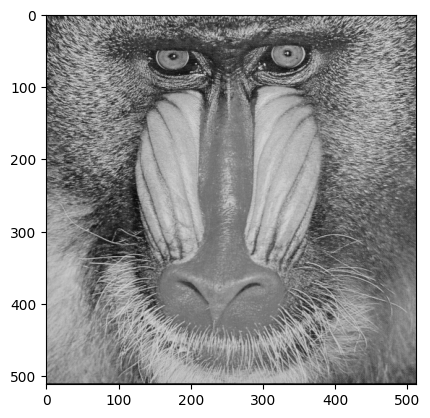

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from pathlib import Path # ファイルシステム
from google.colab import drive # Google drive
drive.mount('/content/drive')
p = Path('/content/drive/My Drive/iicex/')  # 画像ファイルのフォルダ
#list( p.iterdir() )  # フォルダの内容をリストにする


#from skimage import io #入出力ライブラリ読込
#img = io.imread('/content/drive/My Drive/iicex/tree.png')  # 画像ファイルの読み込み
from PIL import Image #pillow読込
PILimg = Image.open('/content/drive/My Drive/iicex/baboon.png')  # 画像ファイルの読み込み
img = PILimg.convert('L') #グレイスケール変換
sampleimg = np.asarray(img) #numpy配列に変換
print("PILimg: ", type(PILimg))
print("img: ", type(sampleimg), sampleimg.shape)

plt.imshow(sampleimg, cmap='gray', vmin=0, vmax=255)

<function matplotlib.pyplot.show(close=None, block=None)>

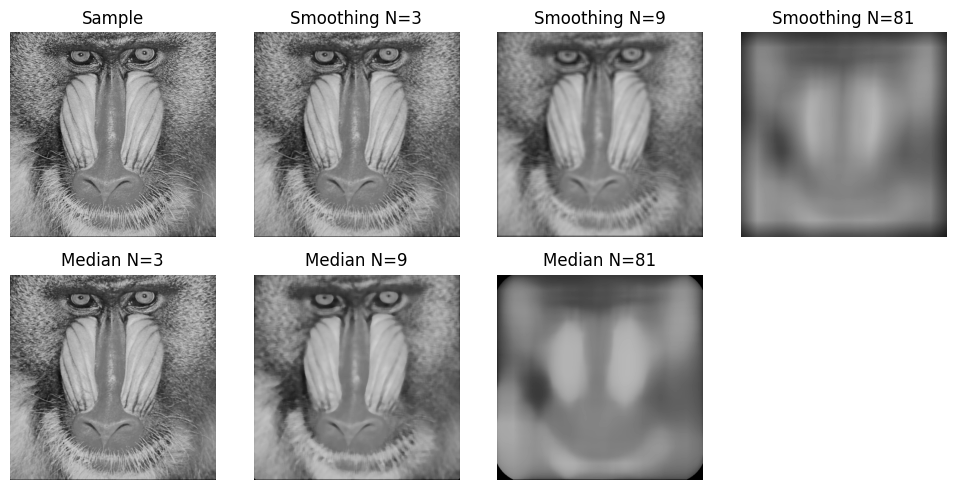

In [9]:
#画像外を補填する方法をやりたい
#https://imagingsolution.net/imaging/make-border/

#外枠をすべてゼロで追加する関数
#https://www.higashisalary.com/entry/opencv-add-frame
def sotowaku (img, num_insert): #num_insertは縁の幅ピクセル
  #枠追加処理(上下)
  bk1=np.zeros((num_insert,img.shape[1]),np.uint8)
  array=np.insert(img, 0, bk1, axis=0)
  array=np.insert(array, array.shape[0], bk1, axis=0)
  #枠追加処理(左右)
  bk2=np.zeros((array.shape[0],num_insert),np.uint8)
  array=np.insert(array, [0], bk2, axis=1)
  array=np.insert(array, [array.shape[1]], bk2, axis=1)
  return array

#print(sotowaku(sampleimg, 100).shape)
#plt.imshow(sotowaku(sampleimg, 100), cmap='gray', vmin=0, vmax=255)



#Smoothing filter
def Sfilter(sampleimg, N):

  #number of row, column
  row = sampleimg.shape[0]
  column = sampleimg.shape[1]
  Simg = np.array([[0 for j in range(column)] for i in range(row)])


  n = N//2 #フィルタのサイズ//2
  sotoimg = sotowaku(sampleimg, n)
  for i in range(row):
    for j in range(column):
      #print("i, j, n: ", i, j, n)
      #print(sampleimg[ i-n : i+n+1, j-n : j+n+1])
      Simg[i, j] = np.sum(sotoimg[ i : i+(2*n)+1, j : j+(2*n)+1] * np.full( (N, N), 1/N**2 ) ) #np.fullメソッド
      #平均とるので1/N**2になる！

  return Simg



#Median filter
def Mfilter(sampleimg, N):

  #number of row, column
  row = sampleimg.shape[0]
  column = sampleimg.shape[1]
  Mimg = np.array([[0 for j in range(column)] for i in range (row)])


  n = N//2 #フィルタのサイズ//2
  sotoimg = sotowaku(sampleimg, N//2)
  for i in range(row):
    for j in range(column):
      #print("i, j, n: ", i, j, n)
      #print(sampleimg[ i-n : i+n+1, j-n : j+n+1])
      Mimg[i, j] = np.median(sotoimg[ i : i+(2*n)+1, j : j+(2*n)+1]) #np.medianメソッド

  return Mimg





# squeeze = Falseとすると分割数1,1でも二次元配列として作成されるのでfor文などでエラーしにくくなる
#plt.subplotsを使うと同時に宣言できる。axesは二次元配列(nd.array)で出てくる
fig, axes = plt.subplots(2, 4, figsize=(10,5), tight_layout=True)
titles = ["Sample", "Smoothing N=3", "Smoothing N=9", "Smoothing N=81", "Median N=3", "Median N=9", "Median N=81"]
imgs = [sampleimg, Sfilter(sampleimg, 3), Sfilter(sampleimg, 9), Sfilter(sampleimg, 81), Mfilter(sampleimg, 3), Mfilter(sampleimg, 9), Mfilter(sampleimg, 81)]
#axes[1,3].set_visible(False) #軸を消す
for row in axes:
  for one in row:
    one.axis("off") #軸を消す

for i in range(2):
  for j in range(4):

    if (i == 1) and (j == 3):
      continue

    #fig.add_subplot()は必要なくなり、配列的に処理ができるようになる。
    axes[i, j].imshow(imgs[4*i + j], cmap='gray', vmin=0, vmax=255) #このimgsの指定の仕方注意!
    axes[i, j].set_title(titles[4*i + j])




plt.show


In [3]:
#3色ver
#外枠をすべてゼロで追加する関数
def sotowaku (img, num_insert): #Nは追加するピクセル数
  #枠追加処理(上下)
  bk1=np.zeros((num_insert,img.shape[1],3),np.uint8)
  #色調整
  bk1[:,:,0]=bk1[:,:,0]+0 #青
  bk1[:,:,1]=bk1[:,:,1]+0 #緑
  bk1[:,:,2]=bk1[:,:,2]+0 #赤
  array=np.insert(img, 0, bk1, axis=0)
  array=np.insert(array, array.shape[0], bk1, axis=0)
  #枠追加処理(左右)
  bk2=np.zeros((array.shape[0],num_insert,3),np.uint8)
  #色調整
  bk2[:,:,0]=bk2[:,:,0]+0 #青
  bk2[:,:,1]=bk2[:,:,1]+0 #緑
  bk2[:,:,2]=bk2[:,:,2]+0 #赤
  array=np.insert(array, [0], bk2, axis=1)
  array=np.insert(array, [array.shape[1]], bk2, axis=1)

'\n#3色ver\n#外枠をすべてゼロで追加する関数\ndef sotowaku (img, num_insert): #Nは追加するピクセル数\n  #枠追加処理(上下)\n  bk1=np.zeros((num_insert,img.shape[1],3),np.uint8)\n  #色調整\n  bk1[:,:,0]=bk1[:,:,0]+0 #青\n  bk1[:,:,1]=bk1[:,:,1]+0 #緑\n  bk1[:,:,2]=bk1[:,:,2]+0 #赤\n  array=np.insert(img, 0, bk1, axis=0)\n  array=np.insert(array, array.shape[0], bk1, axis=0)\n  #枠追加処理(左右)\n  bk2=np.zeros((array.shape[0],num_insert,3),np.uint8)\n  #色調整\n  bk2[:,:,0]=bk2[:,:,0]+0 #青\n  bk2[:,:,1]=bk2[:,:,1]+0 #緑\n  bk2[:,:,2]=bk2[:,:,2]+0 #赤\n  array=np.insert(array, [0], bk2, axis=1)\n  array=np.insert(array, [array.shape[1]], bk2, axis=1)\n'